**EDA for health expenditure**

In [ ]:
# load libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# read file using read_csv function

df = pd.read_csv('/content/healthexp.csv')
#df.head()
df.tail()

,Year,Country,Spending_USD,Life_Expectancy
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7
273,2020,USA,11859.179,77.0


In [ ]:
df.describe()

,Year,Spending_USD,Life_Expectancy
count,274.000000,274.000000,274.000000
mean,1996.992701,2789.338905,77.909489
std,14.180933,2194.939785,3.276263
min,1970.000000,123.993000,70.600000
25%,1985.250000,1038.357000,75.525000
50%,1998.000000,2295.578000,78.100000
75%,2009.000000,4055.610000,80.575000
max,2020.000000,11859.179000,84.700000


In [ ]:
df.dtypes

Year                 int64
Country             object
Spending_USD       float64
Life_Expectancy    float64
dtype: object

In [ ]:
df.dtypes['Year']

dtype('int64')

In [ ]:
#number of rows and columns
df.shape

(274, 4)

In [ ]:
# summary of the data: column names, total no.of non-null values, data types, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


In [ ]:
# identify duplicate rows
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
269    False
270    False
271    False
272    False
273    False
Length: 274, dtype: bool

In [ ]:
df[df.duplicated()].shape

(0, 4)

In [ ]:
# dropping Country column as it is of `object` datatype and store it in different variable
data = df.drop('Country', axis=1)
data.head()

,Year,Spending_USD,Life_Expectancy
0,1970,252.311,70.6
1,1970,192.143,72.2
2,1970,123.993,71.9
3,1970,150.437,72.0
4,1970,326.961,70.9


In [ ]:
# renaming the column names in CamelCase format
dataCleaned = data.rename({'Spending_USD':'SpendingUSD', 'Life_Expectancy':'LifeExpectancy'}, axis=1)
dataCleaned.head()

,Year,SpendingUSD,LifeExpectancy
0,1970,252.311,70.6
1,1970,192.143,72.2
2,1970,123.993,71.9
3,1970,150.437,72.0
4,1970,326.961,70.9


<Axes: >

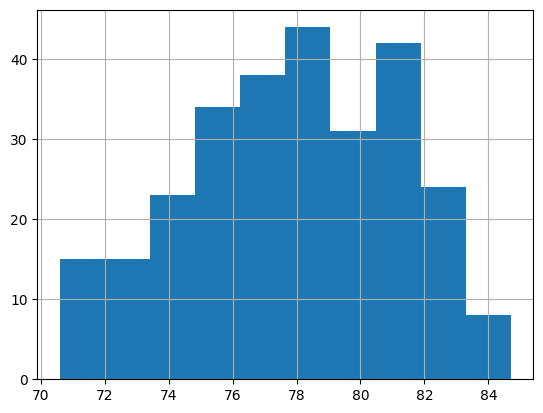

In [ ]:
# histogram
dataCleaned['LifeExpectancy'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7bd803205960>,
 'caps': [<matplotlib.lines.Line2D at 0x7bd803206ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bd803206a10>],
 'medians': [<matplotlib.lines.Line2D at 0x7bd803205ba0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bd803205690>],
 'means': []}

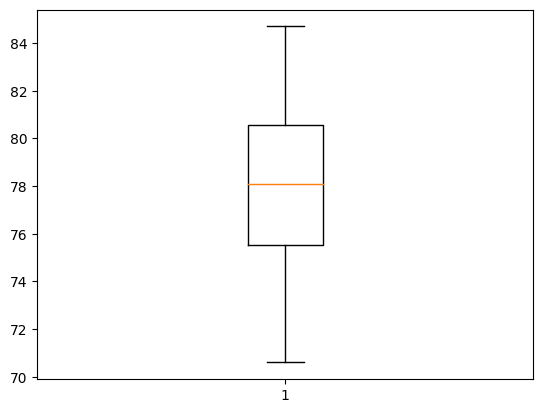

In [ ]:
# box plot
data_box = dataCleaned.dropna()
plt.boxplot(data_box.LifeExpectancy)

{'whiskers': [<matplotlib.lines.Line2D at 0x7bd800342bf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bd8003408b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bd800341870>],
 'medians': [<matplotlib.lines.Line2D at 0x7bd800342950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bd8003438e0>],
 'means': []}

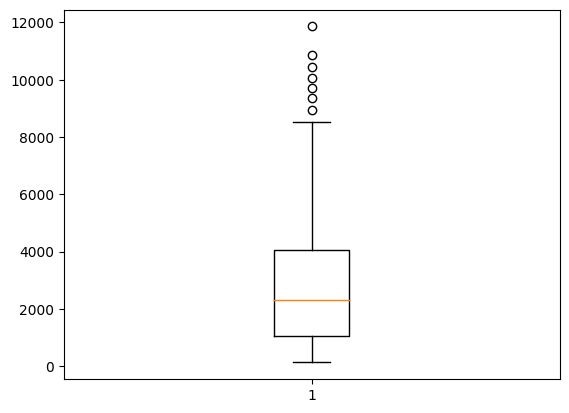

In [ ]:
plt.boxplot(data_box.SpendingUSD)

In [ ]:
#import seaborn library
import seaborn as sns

<Axes: >

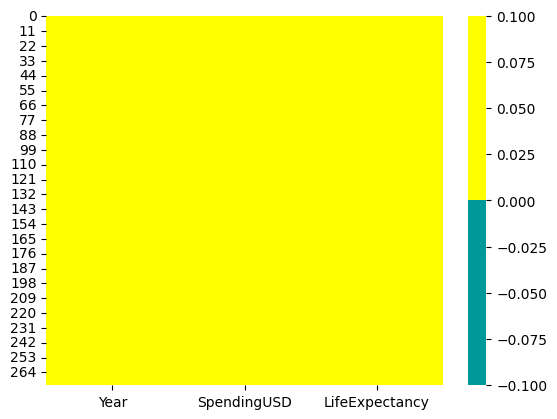

In [ ]:
colors = ['#009999','#ffff00']
#Yellow stands for missing value
cols = dataCleaned.columns
sns.heatmap(dataCleaned[cols].isnull(), cmap=sns.color_palette(colors))

In [ ]:
cols

Index(['Year', 'SpendingUSD', 'LifeExpectancy'], dtype='object')

In [ ]:
dataCleaned[dataCleaned.isnull().any(axis=1)].head(30)

,Year,SpendingUSD,LifeExpectancy


In [ ]:
dataCleaned.isnull().sum()

Year              0
SpendingUSD       0
LifeExpectancy    0
dtype: int64

In [ ]:
dataCleaned.notnull().sum()

Year              274
SpendingUSD       274
LifeExpectancy    274
dtype: int64